In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from smoker_status.config import RAW_DATA_DIR
from smoker_status.features import setup_X2
from smoker_status.util import count_missing_values, plot_feature_histograms, try_clustering2, plot_within_cluster_sum_squares, cluster_and_classify2

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

df = pd.read_csv(RAW_DATA_DIR / 'train.csv')

In [49]:
X = df.drop(['id'], axis=1)
y = X.pop('smoking')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_predict, y_test)

0.7380329447223559

In [51]:
X_train, X_test = setup_X2(X_train, X_test)

hi
0
X_train
> age, Missing 0 (0.000000%)
> height(cm), Missing 0 (0.000000%)
> weight(kg), Missing 0 (0.000000%)
> waist(cm), Missing 0 (0.000000%)
> eyesight(left), Missing 0 (0.000000%)
> eyesight(right), Missing 0 (0.000000%)
> hearing(left), Missing 0 (0.000000%)
> hearing(right), Missing 0 (0.000000%)
> systolic, Missing 0 (0.000000%)
> relaxation, Missing 0 (0.000000%)
> fasting blood sugar, Missing 0 (0.000000%)
> Cholesterol, Missing 0 (0.000000%)
> triglyceride, Missing 0 (0.000000%)
> HDL, Missing 0 (0.000000%)
> LDL, Missing 0 (0.000000%)
> hemoglobin, Missing 0 (0.000000%)
> Urine protein, Missing 0 (0.000000%)
> serum creatinine, Missing 0 (0.000000%)
> AST, Missing 0 (0.000000%)
> ALT, Missing 0 (0.000000%)
> Gtp, Missing 0 (0.000000%)
> dental caries, Missing 0 (0.000000%)
> sex, Missing 0 (0.000000%)
X_test
> age, Missing 0 (0.000000%)
> height(cm), Missing 0 (0.000000%)
> weight(kg), Missing 0 (0.000000%)
> waist(cm), Missing 0 (0.000000%)
> eyesight(left), Missing 0 

In [52]:
X_train.describe()

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,sex,anemia,HDL class,LDL class,Cholesterol class,blood pressure class,GGT level,triglyceride class,creatinine class,ALT class,AST class,FPG class,BMI class,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,AST/ALT,BMI
count,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,111479.000000,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05,1.114790e+05
mean,0.998019,0.993704,1.023215,1.023107,1.074032,0.198863,0.279003,0.044412,1.252514,1.032311,0.509917,1.156074,1.455628,0.464052,0.126562,0.309726,0.264050,1.397429,2.052216,1.896837e-16,1.442004e-15,-3.620308e-16,1.630413e-15,3.429094e-16,3.490282e-16,5.531167e-15,1.501663e-16,2.776419e-16,-1.143456e-16,8.468205e-16,2.021763e-16,-1.376737e-17,-2.655508e-15,5.019990e-16,9.496934e-17,-2.154338e-16,-1.174433e-15
std,0.310892,0.310074,0.150587,0.150246,0.347195,0.399146,1.677710,0.257734,0.610638,0.856721,0.594765,1.020676,1.132633,0.724047,0.332483,0.462383,0.440828,0.563763,1.009255,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.052954e+00,-3.426561e+00,-2.946532e+00,-3.564940e+00,-3.420424e+00,-3.653888e+00,-5.513883e+00,-4.179340e+00,-4.805229e+00,-2.706888e+00,-1.700707e+01,-6.286579e+00,-5.729770e+00,-4.500115e+00,-5.258306e+00,-3.839179e+00,-4.005373e+00,-3.773912e+00
25%,0.800000,0.800000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-3.628265e-01,-5.948135e-01,-5.655041e-01,-6.673001e-01,-6.718437e-01,-7.655900e-01,-5.853351e-01,-7.323784e-01,-6.985760e-01,-7.766374e-01,-6.696525e-01,-6.965983e-01,-4.883723e-01,-6.590509e-01,-7.595911e-01,-7.747836e-01,-7.373942e-01,-6.604501e-01
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-3.628265e-01,-2.846404e-02,-1.686662e-01,1.386011e-03,-1.221276e-01,1.231171e-01,-1.090382e-01,4.142939e-02,5.616626e-02,-1.332204e-01,9.245602e-02,1.418988e-01,8.706187e-02,-4.946129e-02,-1.241549e-01,-1.310248e-01,-3.576905e-02,-6.783376e-02
75%,1.200000,1.200000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,9.047691e-01,5.378854e-01,6.250097e-01,6.700721e-01,5.846502e-01,5.674706e-01,4.107357e-01,7.448910e-01,7.377246e-01,5.816873e-01,7.377639e-01,7.008969e-01,6.329733e-01,5.879873e-01,6.347452e-01,6.566586e-01,6.508154e-01,5.065970e-01
max,2.000000,2.000000,2.000000,2.000000,6.000000,1.000000,2.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,3.439960e+00,2.803283e+00,4.990227e+00,4.905084e+00,7.102712e+00,5.011006e+00,9.997609e+00,6.935353e+00,3.648248e+00,5.729023e+00,1.184135e+01,4.334384e+00,1.867931e+01,1.197474e+01,1.005467e+01,5.679172e+00,1.699415e+01,5.707365e+00


In [53]:
X_test.describe()

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,sex,anemia,HDL class,LDL class,Cholesterol class,blood pressure class,GGT level,triglyceride class,creatinine class,ALT class,AST class,FPG class,BMI class,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,AST/ALT,BMI
count,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000,47777.000000
mean,0.996597,0.993744,1.025745,1.024154,1.074701,0.195973,0.291735,0.044770,1.253616,1.028675,0.507357,1.148377,1.456433,0.464240,0.126483,0.310359,0.264897,1.392051,2.053813,0.003703,0.005903,0.004904,0.005359,-0.013483,-0.006535,-0.009302,-0.003044,0.001567,-0.002569,-0.002294,0.000096,-0.001539,0.005432,0.000025,0.000512,0.005729,0.002500
std,0.312195,0.311445,0.158374,0.153528,0.349396,0.396952,1.673048,0.260064,0.610660,0.857338,0.595734,1.017072,1.133388,0.724349,0.332397,0.462645,0.441283,0.562925,1.006225,1.002489,0.996396,0.996441,0.994450,0.998750,0.997317,1.000579,0.996020,1.002406,0.994344,1.001878,1.000189,0.998287,1.001072,0.998999,1.003906,1.011524,0.995132
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.052954,-3.426561,-2.946532,-3.007702,-3.577486,-3.431711,-4.206957,-3.511052,-4.258149,-3.350305,-17.007070,-6.915452,-5.729770,-4.033251,-5.258306,-3.361577,-3.719387,-3.295313
25%,0.800000,0.800000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.362827,-0.594813,-0.565504,-0.667300,-0.671844,-0.765590,-0.585335,-0.732378,-0.698576,-0.776637,-0.669652,-0.696598,-0.488372,-0.659051,-0.759591,-0.774784,-0.747709,-0.660450
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-0.362827,-0.028464,-0.168666,0.001386,-0.122128,0.123117,-0.109038,0.006256,0.056166,-0.133220,0.092456,0.141899,0.087062,-0.049461,-0.124155,-0.131025,-0.035769,-0.067834
75%,1.200000,1.200000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.904769,0.537885,0.625010,0.670072,0.584650,0.567471,0.410736,0.744891,0.737725,0.581687,0.737764,0.700897,0.632973,0.587987,0.634745,0.656659,0.650815,0.528898
max,2.000000,2.000000,2.000000,2.000000,6.000000,1.000000,2.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5.000000,3.439960,2.803283,4.593389,4.905084,6.317404,6.232978,9.877615,5.458084,2.704714,5.657532,11.361536,3.915136,5.297294,9.537812,8.810683,5.805016,15.222003,6.324268


In [54]:
clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_predict, y_test)

0.7625635766163635

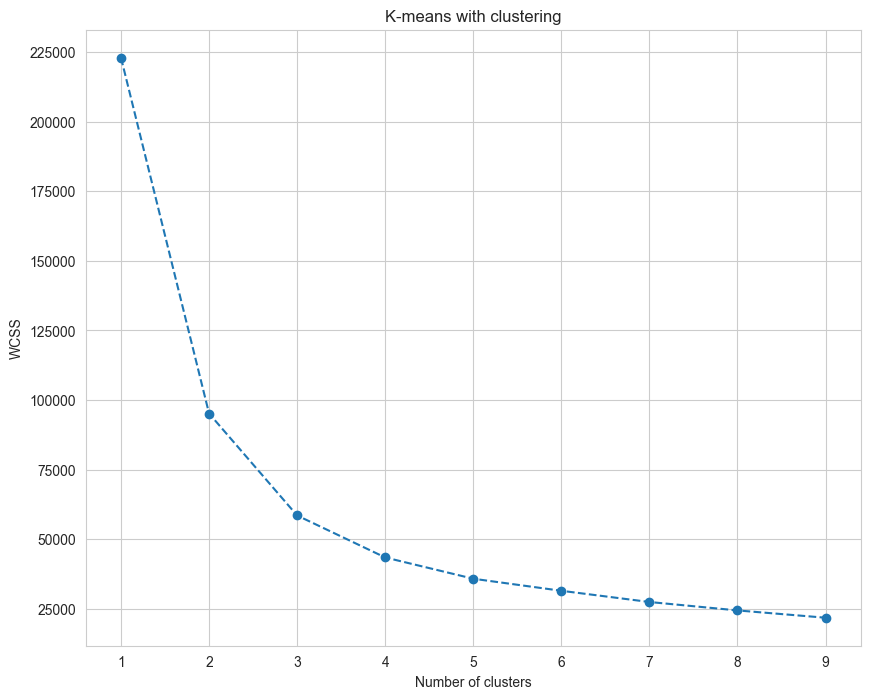

In [ ]:
clustering_cols = ['relaxation', 'systolic']
# clustering_cols = ['height(cm)', 'hemoglobin']
# clustering_cols = ['height(cm)', 'weight(kg)']
# clustering_cols = ['BMI', 'waist(cm)']
plot_within_cluster_sum_squares(X_train, clustering_cols)

In [91]:
n_clusters = 4
# try_clustering2(X_train, X_test, clustering_cols, n_clusters, True)

In [98]:
classifiers: list[RandomForestClassifier | LogisticRegression | DecisionTreeClassifier | KNeighborsClassifier] = [
    # RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    LogisticRegression(n_jobs=-1),
    DecisionTreeClassifier(min_samples_leaf=100, random_state=0),
    # KNeighborsClassifier(n_neighbors=51, n_jobs=-1),
]
colors = ['pink', 'purple', 'green', 'orange']

for clf in classifiers:
    print(clf)

    # # Single Model
    # print('Single Model')
    # clf.fit(X_train, y_train)
    # y_predict = clf.predict(X_test)
    # print(metrics.accuracy_score(y_predict, y_test))
    # y_predict_proba = clf.predict_proba(X_test)
    # base_fpr, base_tpr, base_thresholds = metrics.roc_curve(y_test, y_predict_proba[:, 1], pos_label=1)
    # base_AUC = metrics.auc(base_fpr, base_tpr)
    # print(f'Single Model ROC AUC score: {base_AUC}')
    # print()

    # Clustering
    res = cluster_and_classify2(X_train, y_train, X_test, y_test, clustering_cols, n_clusters, clf)
    print('Clustered accuracy scores')
    for acc in res[0]:
        print(acc)
    print(f'Average: {np.mean(res[0])}')
    print('Clustered AUC scores')
    for auc in res[3]:
        print(auc)
    print(f'Average: {np.mean(res[3])}')
    print('==============================')

    # plt.figure()
    # # Roc Curve:
    # plt.plot(base_fpr, base_tpr, color='red', lw=2, label=f'Single Model ROC Curve (area = {base_AUC:0.2f})', zorder=3)
    # for i in range(0, len(res[1])):
    #     plt.plot(res[1][i], res[2][i], color=colors[i], lw=2, label=f'Cluster {i} ROC Curve (area = {res[3][i]:0.2f})', linestyle='--', zorder=3)

    # # Random Guess line:
    # plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

    # # Defining The Range of X-Axis and Y-Axis:
    # plt.xlim([0, 1])
    # plt.ylim([0, 1])

    # # Labels, Title, Legend:
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'{str(clf)} ROC')
    # plt.legend(loc='lower right')
    # plt.show()



LogisticRegression(n_jobs=-1)
Optimal number of features: 28
Optimal number of features: 34
Optimal number of features: 35
Optimal number of features: 31
Clustered accuracy scores
0.8534248067080474
0.7303992455202767
0.7216921119592875
0.7645875251509054
Average: 0.7675259223346294
Clustered AUC scores
0.9080653303287216
0.8023595178244666
0.7811612393803078
0.8498225063357825
Average: 0.8353521484673196
DecisionTreeClassifier(min_samples_leaf=100, random_state=0)
Optimal number of features: 5
Optimal number of features: 7
Optimal number of features: 6
Optimal number of features: 6
Clustered accuracy scores
0.8464554067298269
0.72354605469978
0.7102417302798982
0.7562343759526858
Average: 0.7591193919155478
Clustered AUC scores
0.8945033324574062
0.7913272100057793
0.7654173040014026
0.8409002263286153
Average: 0.8230370181983009


In [94]:
X_train

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,sex,anemia,HDL class,LDL class,Cholesterol class,blood pressure class,GGT level,triglyceride class,creatinine class,ALT class,AST class,FPG class,BMI class,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,AST/ALT,BMI
120360,0.8,0.7,2,2,1,0,-2.0,0,1,1,0,2,0,0,0,0,0,2,1,2.172365,-1.161163,-0.962342,-0.667300,0.898774,0.900736,0.338663,0.076602,-0.284005,-0.276202,0.544436,0.491273,0.087062,-0.049461,-0.315390,-1.404803,0.323377,-0.461670
151697,0.7,0.8,1,1,1,0,2.0,0,1,1,0,1,0,0,0,0,1,1,3,0.904769,-0.594813,0.625010,-0.110062,-0.200658,-0.432325,-0.503810,-1.013763,-0.426444,-0.776637,-0.251465,-0.976097,-1.096706,1.025594,0.363124,-0.531396,0.268909,1.436634
77285,1.0,1.2,1,1,1,1,-1.0,0,2,0,0,2,2,0,0,0,0,2,1,-0.362827,-0.028464,-0.565504,0.168558,1.841144,0.567471,0.192395,-0.802725,-1.295053,1.868521,-1.439094,-0.696598,-1.741930,-0.496404,-0.315390,-0.386942,-0.069598,-0.714889
157747,1.0,1.0,1,1,1,0,2.0,0,0,1,0,2,2,1,0,1,1,2,3,-1.630422,1.104235,1.815524,1.673101,1.212897,1.011824,0.482119,-0.767551,0.667716,-1.277073,-0.291467,0.491273,0.632973,1.025594,1.926228,0.831576,-1.625443,1.463572
121522,0.9,0.9,1,1,1,1,-2.0,0,2,2,1,0,2,0,0,0,0,1,1,-0.362827,-1.161163,-1.756018,-0.221509,-0.907436,-1.098855,-1.006885,0.991103,-1.074778,1.868521,0.642207,-1.255596,-1.741930,-0.829635,-1.491780,-0.191401,1.518954,-1.695477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1.2,1.0,1,1,1,0,-0.4,0,1,2,1,0,0,1,0,0,0,1,3,0.904769,-0.594813,0.228172,0.781520,-0.828905,-0.543413,-0.835396,1.272487,1.004503,-0.276202,1.012100,-0.207475,-0.488372,-1.397848,-1.323519,-1.060085,0.650815,0.857684
109259,1.0,0.8,1,1,1,0,1.0,0,2,0,0,2,2,0,0,1,1,2,1,0.482237,0.537885,-0.168666,0.235426,0.584650,0.345294,0.761009,-1.893090,-0.773161,0.724669,-2.514802,0.281648,0.632973,2.157646,0.985916,0.331688,0.349940,-0.580675
50057,1.2,1.2,1,1,1,0,2.0,0,1,1,1,2,3,2,0,1,0,2,3,-0.785358,0.537885,1.418686,1.673101,-0.200658,0.789647,0.761009,0.357987,1.598298,-0.204711,-0.372628,0.351523,1.152244,0.087666,1.091045,1.317458,-1.362488,1.470689
5192,0.9,1.0,1,1,1,0,1.0,0,1,2,1,1,1,1,0,0,0,2,1,0.904769,0.537885,-0.168666,0.948691,0.113465,-0.543413,1.029847,1.272487,0.943806,-0.133220,0.982484,0.141899,0.632973,0.087666,-0.315390,-0.072767,0.448435,-0.580675


In [95]:
y_train

120360    0
151697    0
77285     0
157747    0
121522    0
         ..
73349     0
109259    1
50057     1
5192      1
128037    1
Name: smoking, Length: 111479, dtype: int64

In [96]:
y_test

118031    0
20900     1
50382     1
75642     1
151809    0
         ..
75863     0
3655      0
135929    1
85090     0
44831     0
Name: smoking, Length: 47777, dtype: int64